# To Do
1) Create projection methods in 2D for sets
    - Rectangle: done
    - Shifted ellipse
2) Implement Push Pull with projection (mostly use the other code)
3) For visualization
    - Plot graph
    - Plot the iterates with the gradients
    - Plot the error terms

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
class Constraint:
    def __init__(self):
        pass

    def project(self, x):
        pass
    
    def feasible(self, x):
        pass

class RectangleConstraint(Constraint):
    # ranges is a list in the form
    # [(l1, u1), (l2,u2), ...]
    # where (ln, un) are the lower and upper bounds for dimension n
    def __init__(self, ranges):
        super().__init__()
        self.lowers = np.array([r[0] for r in ranges])
        self.uppers = np.array([r[1] for r in ranges])
    
    # return the projection of x onto the convex set described by the constraints above
    # projection works when you supply a matrix where row i is agent i's decision variable vector
    def project(self, x):
        x = np.minimum(x, self.uppers)
        x = np.maximum(x, self.lowers)
        return x

    # return true if point is feasible
    def feasible(self, x):
        return np.all([x <= self.uppers, x >= self.lowers])

# not implemented yet!!!
class EllipseConstraint(Constraint):
    # ellipsed centered at 'center', 
    def __init__(self, center, P):
        super().__init__()
        raise NotImplementedError
            
    def project(self, x):
        raise NotImplementedError

    def feasible(self, x):
        raise NotImplementedError

In [12]:
cnst = RectangleConstraint([(1,3), (2, 4)])
x = np.array([0, 3])
cnst.project(x), cnst.feasible(x)

(array([1, 3]), False)

In [13]:
x = np.array([[0, 3], [1, 2], [5, 6]]) # each row is an agent's x vector
cnst.project(x)

array([[1, 3],
       [1, 2],
       [3, 4]])

## Initialize Network
Initialize a networkx graph by adding nodes and edges between the nodes. Do not add self-loops here to get a better visualization

In [6]:
n_agents = 4

G = nx.DiGraph()
G.add_nodes_from(list(range(1, n_agents+1)))
G.add_edges_from([(1,2), (2,3), (3,4), (4,1), (1,3)])

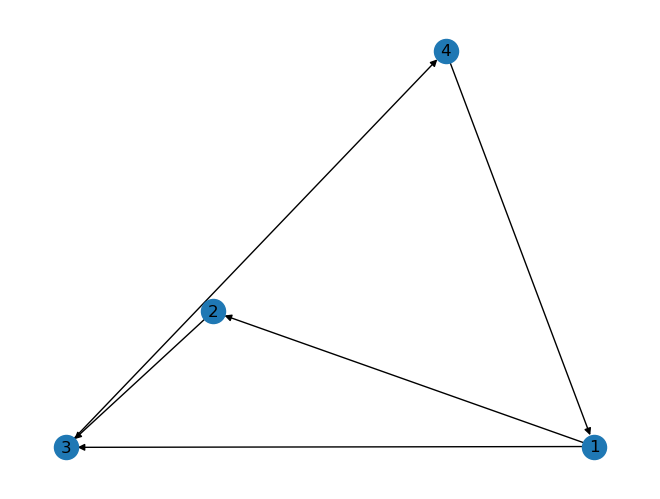

## Initialize Consensus Matrices
In this section, we get the adjacency matrix and initialize row and column stochastic matrices $R$ and $C$ by dividing the transpose of the adjacency matrix (which gives the direction of information flow) by the row and column sums

In [45]:
A = nx.to_numpy_array(G)
np.fill_diagonal(A, 1)

In [47]:
# row and column stochastic matrices
A = A.T # take the transpose since this is the direction of information flow

R = A/A.sum(axis=1)[:, None]
C = A/A.sum(axis=0)
print(f'R:\n{R}')
print(f'C:\n{C}')

R:
[[0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.5        0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.         0.         0.5       ]]
C:
[[0.5        0.5        0.33333333 0.        ]
 [0.         0.5        0.33333333 0.        ]
 [0.         0.         0.33333333 0.5       ]
 [0.5        0.         0.         0.5       ]]


## Find Left and Right Eigenvectors of R and C
Here, we have $\phi^TR = \phi^T$ and $C\pi=\pi$. We find these by iteratively applying the matrices to a vector of ones

In [64]:
phi = np.ones((1, 4))
pi = np.ones((4, 1))

for i in range(100):
    phi = phi @ R
    pi = C @ pi

assert(np.all(np.isclose(pi, C @ pi)))
assert(np.all(np.isclose(phi, phi @ R)))

phi, pi = phi.flatten(), pi.flatten()
print(f'phi: {phi/phi.sum()}')
print(f'pi: {pi/pi.sum()}')

phi: [0.23076923 0.15384615 0.30769231 0.30769231]
pi: [0.30769231 0.15384615 0.23076923 0.30769231]


In [ ]:
x = np.zeros()

## Specify objectives/gradients

In [65]:
# objectives are $a_i(x-b_i)^2
a = np.array([1, 2, 3, 4])
b = np.array([4, 3, 2, 1])
def gradient(x, agent):
    return 2 * a[agent] * (x - b[agent])

## Specify the projection operator
Here, implement the projection operator of the set you are considering. If unconstrained, just return x

In [ ]:
def project(x):
    return x

In [ ]:
learning_rate = 0.1
num_iterations = 20

for i in range(num_iterations):
    